In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import sympy
from sympy import *
sympy.init_printing()

In [2]:
x,t,theta = symbols('x,t,theta')

In [3]:
f = cos(x+t) + theta
lambda_f = lambdify((x,t,theta), f)
f

In [4]:
loss = x**2
lambda_loss = lambdify((x,), loss)
loss

In [5]:
dx = f.diff(x)
dtheta = f.diff(theta)
dloss = loss.diff(x)
lambda_dx = lambdify((x,t,theta), dx)
lambda_dtheta = lambdify((x,t,theta), dtheta)
lambda_dloss = lambdify((x,), dloss)
dx, dtheta, dloss

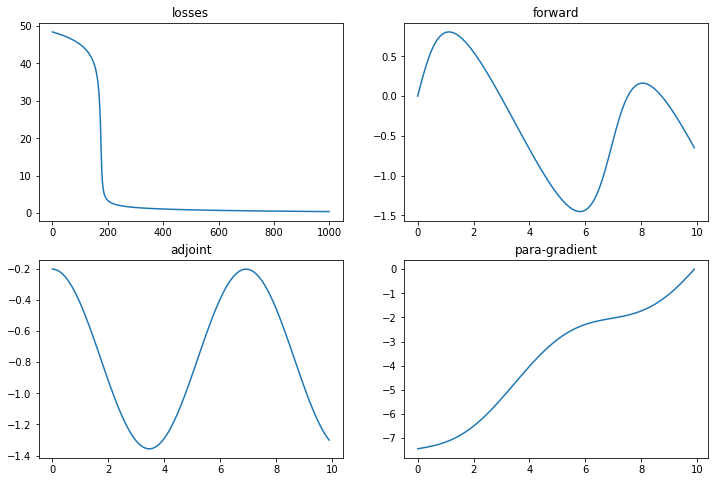

In [6]:
learning_rate = 1e-5
para = 0.
time_step = 0.1
times = np.arange(0, 10, time_step)
losses = []
for epoch in range(1000):
    forward = scipy.integrate.odeint(lambda_f, 0, times, args=(para,))
    def aug_dynamics(dyn_vector, t, theta):
        x, a, _ = dyn_vector
        return np.array([
            lambda_f(x, t, theta),
            -a * lambda_dx(x, t, theta),
            -a * lambda_dtheta(x, t, theta)
        ])
    backward = np.flip(scipy.integrate.odeint(
        aug_dynamics,
        np.array([forward[-1,0], lambda_dloss(forward[-1,0]), 0.]),
        np.flip(times), args=(para,)),
        axis=0)
    para -= learning_rate * backward[0,2]
    losses.append(lambda_loss(forward[-1,0]))
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.title('losses')
plt.plot(losses)
plt.subplot(2,2,2)
plt.title('forward')
plt.plot(times, backward[:,0])
plt.subplot(2,2,3)
plt.title('adjoint')
plt.plot(times, backward[:,1])
plt.subplot(2,2,4)
plt.title('para-gradient')
plt.plot(times, backward[:,2])
plt.show()